# 2주차 프로젝트 / 곽영효

-  교통카드 이용데이터 분석
    - 전국의 다른 지역들과의 비교로 알아보는 대구의 현 위치 

In [381]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# 파일관련 변수 선언 -----------
DIR_PATH = './Data_영효/'
filelist = os.listdir(DIR_PATH)


In [382]:
# Matplotlib 한글 Font 설정 ---------
from matplotlib import font_manager as fm, rc

# 한글 Font 설정
font_path = '../Fonts/malgun.ttf'
font_name = fm.FontProperties(fname = font_path).get_name()
rc('font', family=font_name)

In [383]:
# 엑셀 불러오기
excel=[]

for f in range(8):
    excel.append(pd.read_csv(DIR_PATH + filelist[f], encoding = 'CP949', thousands=',')) # thousands => 세자리마다 있는 0 제거

excel[0]

,구분1,평일,토요일,일요일
0,서울,2386,2261,2174
1,부산,2192,2109,2060
2,대구,2135,2052,2005
3,인천,2427,2274,2231
4,광주,1977,1903,1874
5,대전,2047,1961,1925
6,울산,2021,1962,1981
7,세종,2111,2077,2006
8,경기,2703,2581,2508
9,강원,1943,1875,1838


In [384]:
excel[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분1     17 non-null     object
 1   평일      17 non-null     int64 
 2   토요일     17 non-null     int64 
 3   일요일     17 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 672.0+ bytes


In [397]:
excel[5].head()

,구분,평일,토요일,일요일
0,서울,7.3,8.5,8.5
1,부산,8.6,9.3,9.1
2,대구,8.2,8.5,8.7
3,인천,7.9,8.9,9.0
4,광주,8.9,9.4,9.2


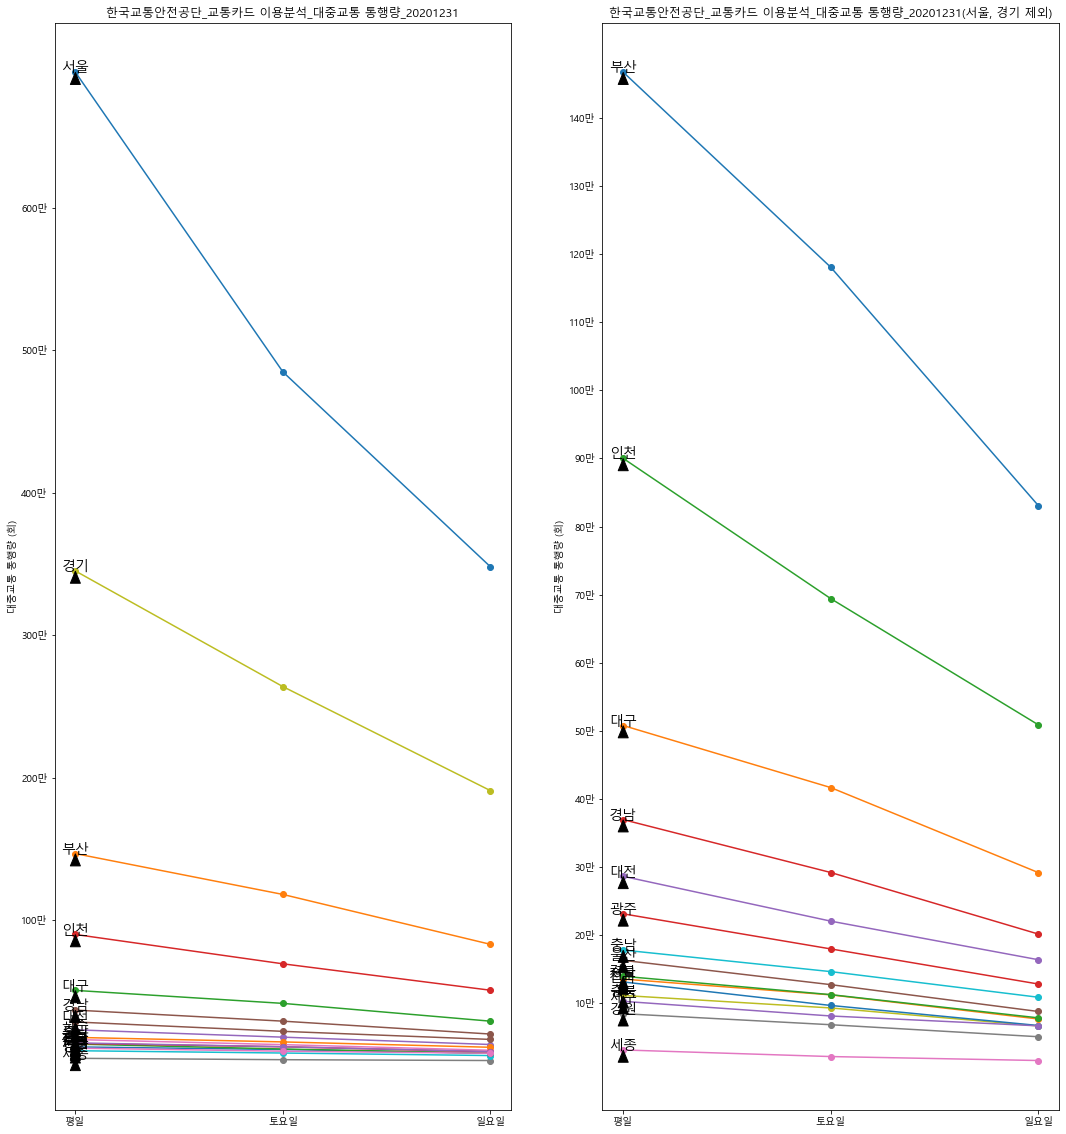

In [386]:
# 여러개 그래프('를 하나에 넣기 => subplot()
fig = plt.figure(figsize = (18,20))

ax1 = fig.add_subplot(121)   # 1행 2열 중에 1번 자리에 넣기

for f in excel[3].index:
    ax1.plot(excel[3].iloc[f][1:], marker = 'o')
    ax1.annotate(excel[3].iloc[f][0], xy=('평일', excel[3].iloc[f][1]), xytext=('평일',excel[3].iloc[f][1]),
            fontsize=14, ha='center',
            arrowprops=dict(facecolor='black', width=1, shrink=0.1, headwidth=10))   # 주석 달기
ax1.set_ylabel('대중교통 통행량 (회)')
ax1.set_title(filelist[3][:-4]) # 제목은 파일 이름을 확장자만 떼고 그대로 가져온다.
ax1.set_yticks(np.arange(1000000, 7000000, 1000000), ('100만', '200만', '300만', '400만', '500만', '600만')) # 눈금 지정


ax2 = fig.add_subplot(122)   # 1행 2열 중에 1번 자리에 넣기

for f in excel[3].index:
    if f != 0 and f != 8 :
        ax2.plot(excel[3].iloc[f][1:], marker = 'o')
        ax2.annotate(excel[3].iloc[f][0], xy=('평일', excel[3].iloc[f][1]), xytext=('평일',excel[3].iloc[f][1]),
                fontsize=14, ha='center',
                arrowprops=dict(facecolor='black', width=1, shrink=0.1, headwidth=10))   # 주석 달기
ax2.set_ylabel('대중교통 통행량 (회)')
ax2.set_title(filelist[3][:-4] + '(서울, 경기 제외)') # 제목은 파일 이름을 확장자만 떼고 그대로 가져온다.
ax2.set_yticks(np.arange(100000, 1500000, 100000), ('10만', '20만', '30만', '40만', '50만', '60만', '70만', '80만',
                                                    '90만', '100만', '110만', '120만', '130만', '140만')) # 눈금 지정

plt.show()

# 분석(대중교통 통행량(전국) / (서울, 경기 제외) 

- 전반적인 유동인구를 나타내는 지표
- 대구는 17개 지역 중 통행량 5위로 수도권인 서울, 경기를 제외하면 3위

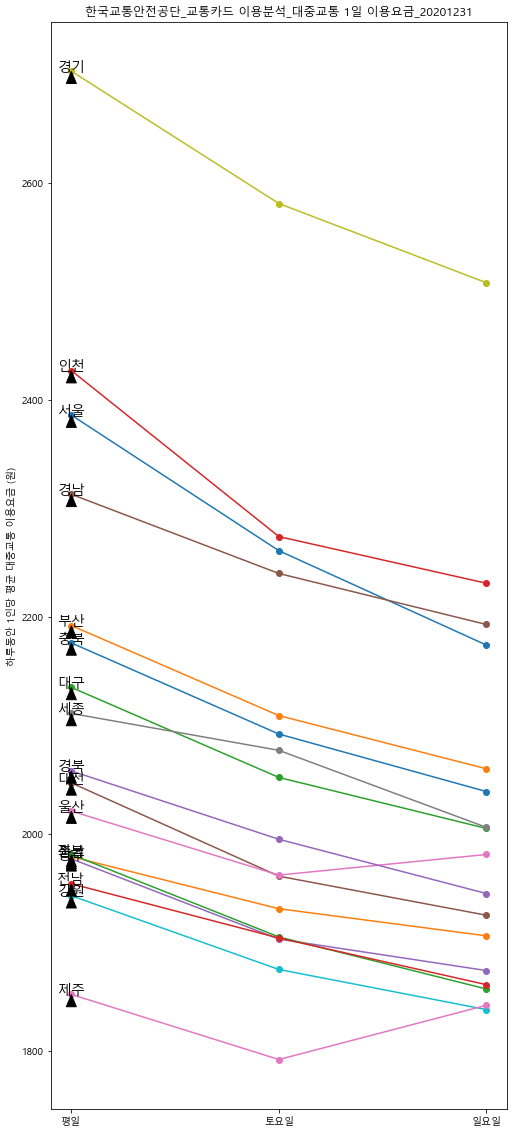

In [390]:
# 여러개 그래프('를 하나에 넣기 => subplot()
fig = plt.figure(figsize = (18,20))

ax1 = fig.add_subplot(121)   # 1행 2열 중에 1번 자리에 넣기

for f in excel[0].index:
    ax1.plot(excel[0].iloc[f][1:], marker = 'o')
    ax1.annotate(excel[0].iloc[f][0], xy=('평일', excel[0].iloc[f][1]), xytext=('평일',excel[0].iloc[f][1]),
            fontsize=14, ha='center',
            arrowprops=dict(facecolor='black', width=1, shrink=0.1, headwidth=10))   # 주석 달기
ax1.set_ylabel('하루동안 1인당 평균 대중교통 이용요금 (원)')
ax1.set_title(filelist[0][:-4]) # 제목은 파일 이름을 확장자만 떼고 그대로 가져온다.

plt.show()

# 분석(대중교통 1일 이용요금)

- 대체적으로 평일 > 토요일 > 일요일 순으로 점차 수가 작아지는 경향을 보인다.
    - 평일은 먼거리를 오가는 출퇴근 및 통학이 대중교통 이용에 큰 비중을 차지하기 때문인 것으로 추측된다.
    - 대구는 17개 지역 중 7위
    - 서울, 부산 등을 오가는 경기, 인천, 경남이 상위권에 위치
    - 대구는 서울, 부산과 비교하면 자가용으로 이동하는 비율이 높을 것이라고 추측

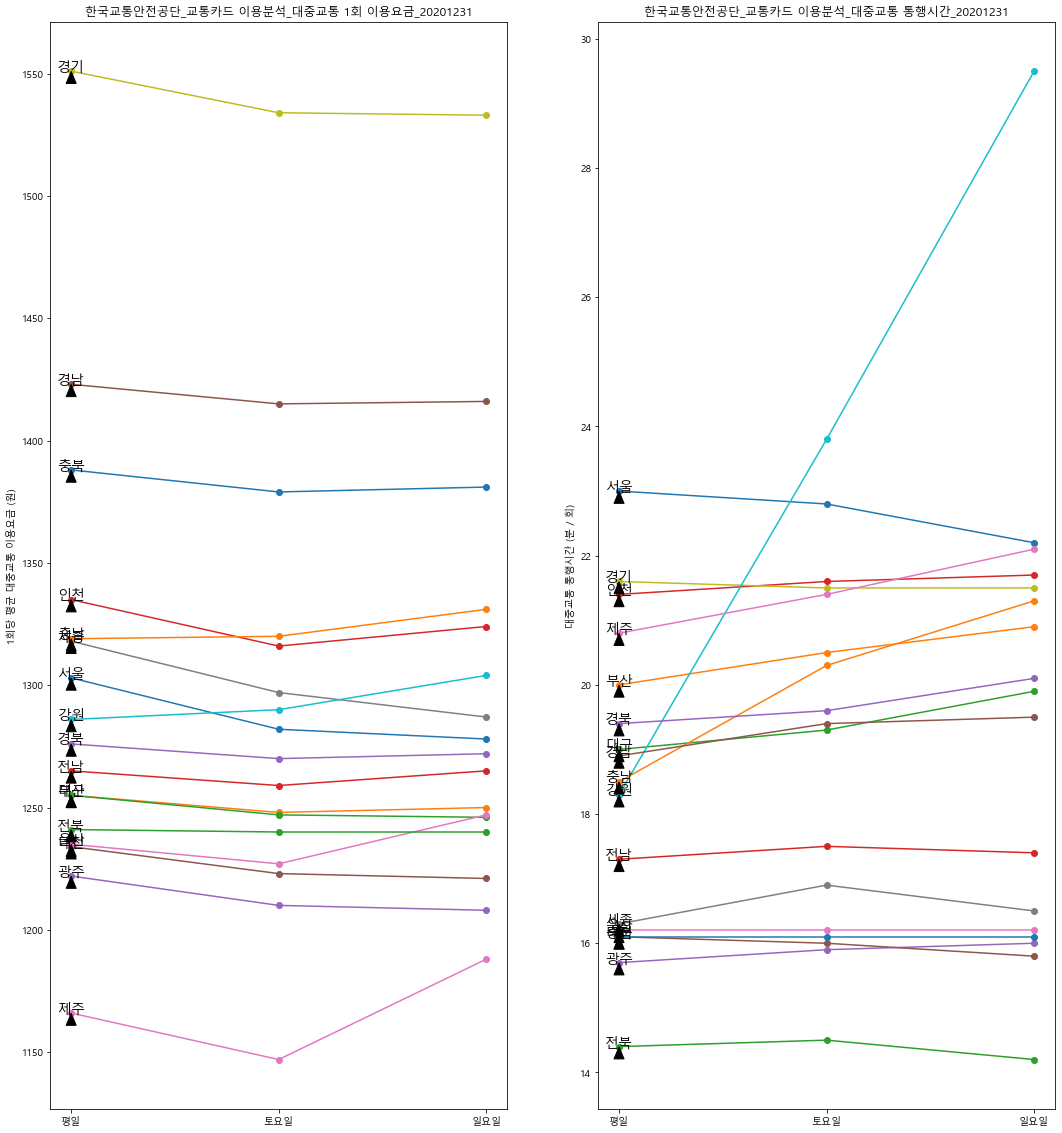

In [387]:
# 여러개 그래프('를 하나에 넣기 => subplot()
fig = plt.figure(figsize = (18,20))

ax1 = fig.add_subplot(121)   # 1행 2열 중에 1번 자리에 넣기

for f in excel[1].index:
    ax1.plot(excel[1].iloc[f][1:], marker = 'o')
    ax1.annotate(excel[1].iloc[f][0], xy=('평일', excel[1].iloc[f][1]), xytext=('평일',excel[1].iloc[f][1]),
            fontsize=14, ha='center',
            arrowprops=dict(facecolor='black', width=1, shrink=0.1, headwidth=10))   # 주석 달기
ax1.set_ylabel('1회당 평균 대중교통 이용요금 (원)')
ax1.set_title(filelist[1][:-4]) # 제목은 파일 이름을 확장자만 떼고 그대로 가져온다.


ax2 = fig.add_subplot(122)   # 1행 2열 중에 2번 자리에 넣기

for f in excel[4].index:
    ax2.plot(excel[4].iloc[f][1:], marker = 'o')
    ax2.annotate(excel[4].iloc[f][0], xy=('평일', excel[4].iloc[f][1]), xytext=('평일',excel[4].iloc[f][1]),
            fontsize=14, ha='center',
            arrowprops=dict(facecolor='black', width=1, shrink=0.1, headwidth=10))   # 주석 달기
ax2.set_ylabel('대중교통 통행시간 (분 / 회)')
ax2.set_title(filelist[4][:-4]) # 제목은 파일 이름을 확장자만 떼고 그대로 가져온다.

plt.show()

# 분석(대중교통 1회 이용요금)

- 대체적으로 평일 > 토요일 > 일요일 순으로 점차 수가 작아지는 경향을 보인다.
    - 경기 / 경남 / 충북 같은 상위권 지역들은 타 지역으로의 이동이 많다는 공통점(ex. 서울 / 부산 / 대전)
    - 하지만 1일 이용요금에 비하면 평일 대비 주말의 감소폭이 작다.
    - 주말 여가활동을 위해 시외버스 등을 타고 인근 대도시로 이동하는 인구의 영향인 것으로 추측된다.
    - 주말에 장거리 시외버스 같은 거 타고 간다던지(비싼 요금)
    - 17개 지역 중 대구는 부산과 공동 11위
        - 대구/경북 생활권의 중심지로써, 타 지역으로 갈 필요가 없기 때문인 것으로 추측

# 분석(대중교통 통행시간) / 한 번 움직일 때 얼마나 오래 타고 가는지

- 17개 지역 중 대구는 7위
- 주말에 먼 거리를 이동하는 농어촌 버스(특히 강원도) / 시외버스 이용률이 높아지는 것으로 추측할 수 있다.

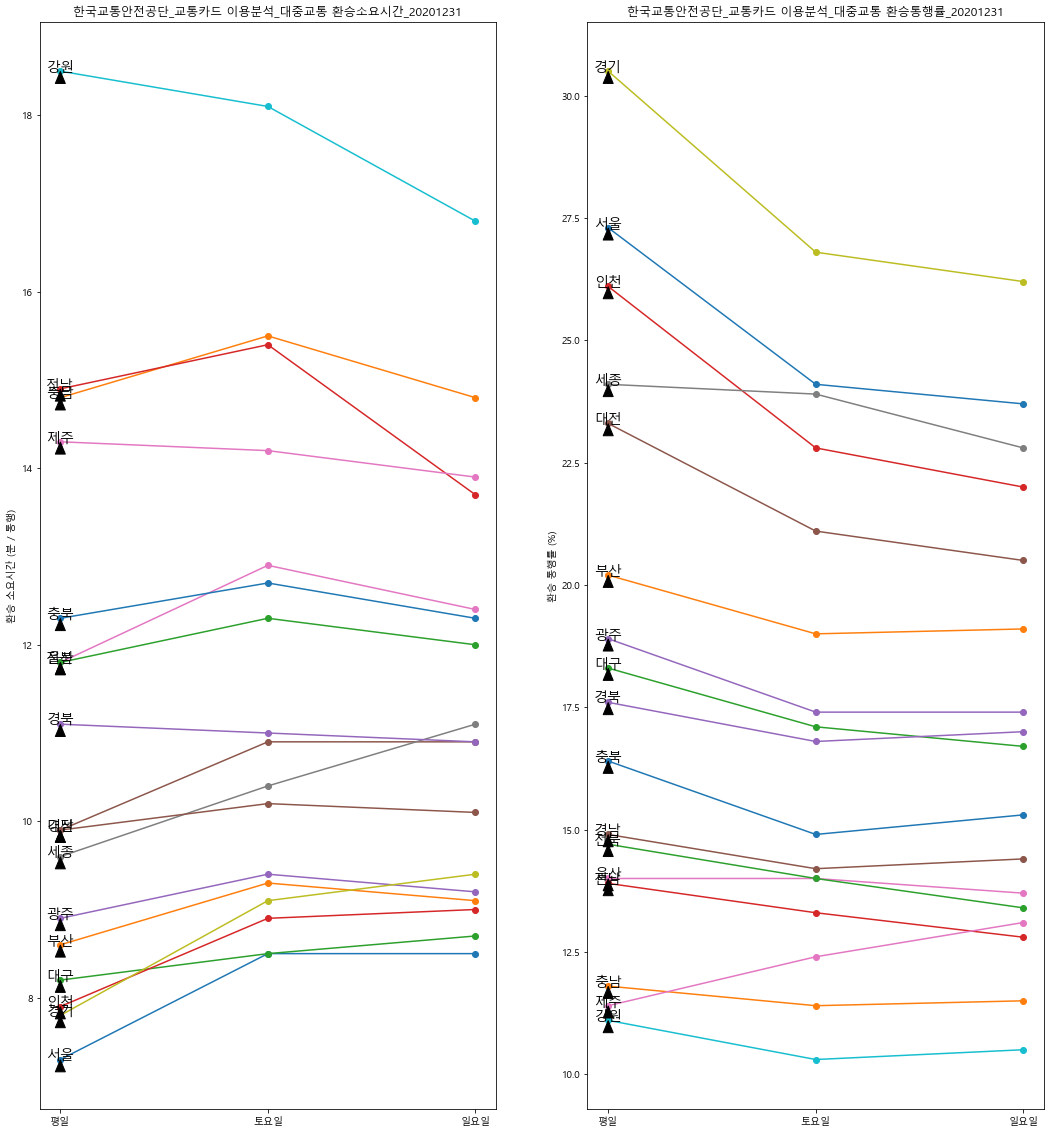

In [389]:
# 여러개 그래프('를 하나에 넣기 => subplot()
fig = plt.figure(figsize = (18,20))

ax1 = fig.add_subplot(121)   # 1행 2열 중에 1번 자리에 넣기

for f in excel[5].index:
    ax1.plot(excel[5].iloc[f][1:], marker = 'o')
    ax1.annotate(excel[5].iloc[f][0], xy=('평일', excel[5].iloc[f][1]), xytext=('평일',excel[5].iloc[f][1]),
            fontsize=14, ha='center',
            arrowprops=dict(facecolor='black', width=1, shrink=0.1, headwidth=10))   # 주석 달기
ax1.set_ylabel('환승 소요시간 (분 / 통행)')
ax1.set_title(filelist[5][:-4]) # 제목은 파일 이름을 확장자만 떼고 그대로 가져온다.


ax2 = fig.add_subplot(122)   # 1행 2열 중에 1번 자리에 넣기

for f in excel[6].index:
    ax2.plot(excel[6].iloc[f][1:], marker = 'o')
    ax2.annotate(excel[6].iloc[f][0], xy=('평일', excel[6].iloc[f][1]), xytext=('평일',excel[6].iloc[f][1]),
            fontsize=14, ha='center',
            arrowprops=dict(facecolor='black', width=1, shrink=0.1, headwidth=10))   # 주석 달기
ax2.set_ylabel('환승 통행률 (%)')
ax2.set_title(filelist[6][:-4]) # 제목은 파일 이름을 확장자만 떼고 그대로 가져온다.

plt.show()

# 분석(환승소요시간)

- 환승하는데 걸리는 시간 
    - 강원 / 전남 / 충남 / 제주가 상위권이고 대구 및 수도권이 하위권
    - 배차간격과 같은 각 지역의 교통 인프라 수준을 알 수 있음

- 대구의 경우 평일기준 뒤에서 4위, 주말기준 뒤에서 2위 수준으로, 교통 인프라 최상위권 지역으로 분류할 수 있다.

# 분석(환승통행률)

- 대중교통 이용 시, 환승을 하는 비율
    - 얼마나 지역 곳곳의 자기가 원하는 곳까지 환승을 통해 갈 수 있는지 알 수 있는 지표
- 대구의 경우 17개 지역 중 8위로 무난한 수준